Import libraries and data set


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Understand data

In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [10]:
df.duplicated().sum()


1

In [11]:
df.drop_duplicates(inplace=True)
df.shape

(1337, 7)

lable encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#sex
df.sex = le.fit_transform(df.sex)
# smoker or not
df.smoker = le.fit_transform(df.smoker)


EDA

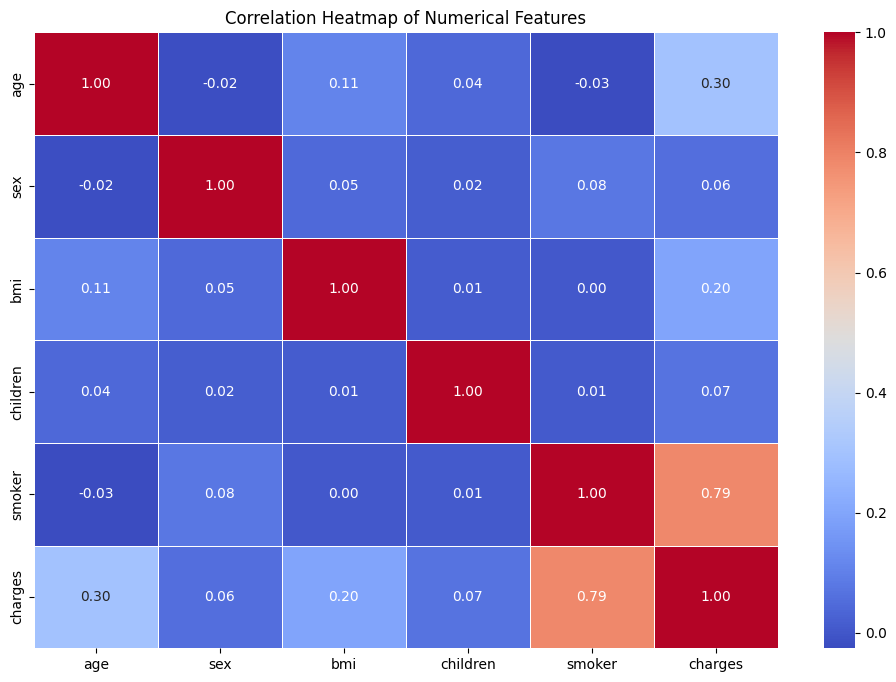

In [13]:
corr_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")

plt.show()

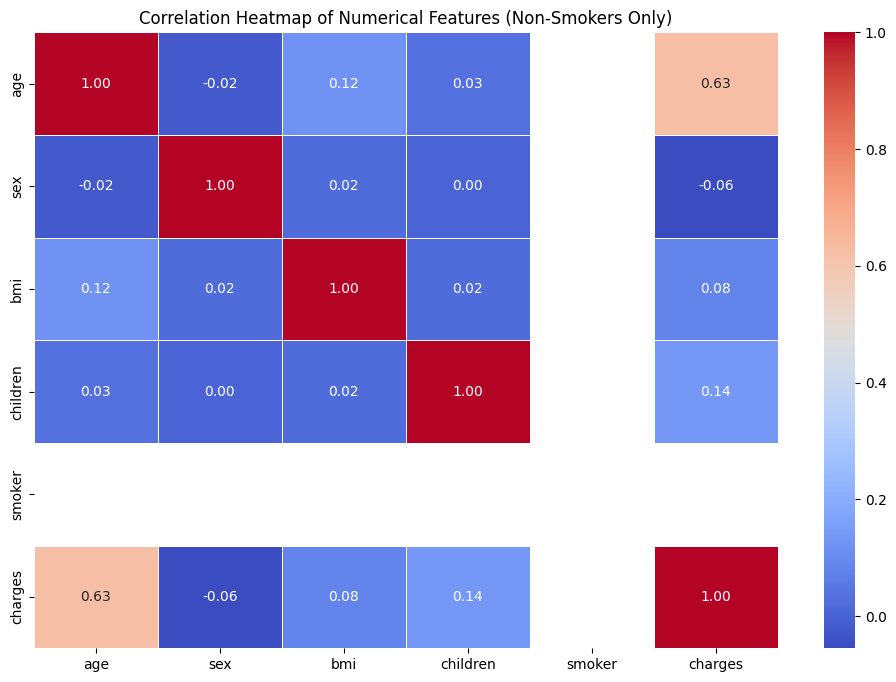

In [14]:
# Filter for non-smokers only
df_non_smokers = df[df["smoker"] == 0]

# Compute correlation matrix for numerical features
corr_matrix = df_non_smokers.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features (Non-Smokers Only)")

plt.show()

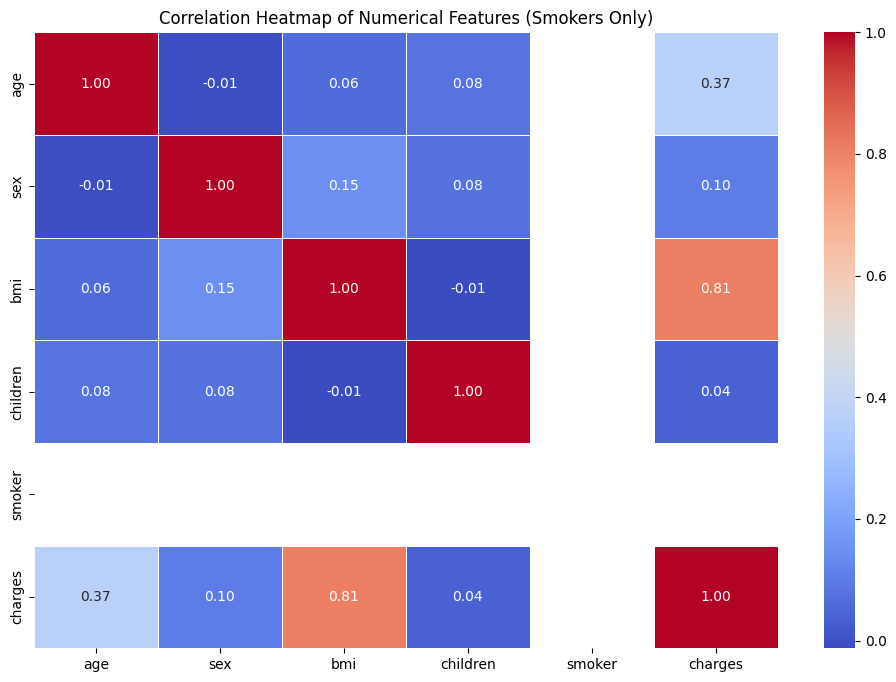

In [15]:
# Filter for smokers only
df_non_smokers = df[df["smoker"] == 1]

# Compute correlation matrix for numerical features
corr_matrix = df_non_smokers.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features (Smokers Only)")

plt.show()

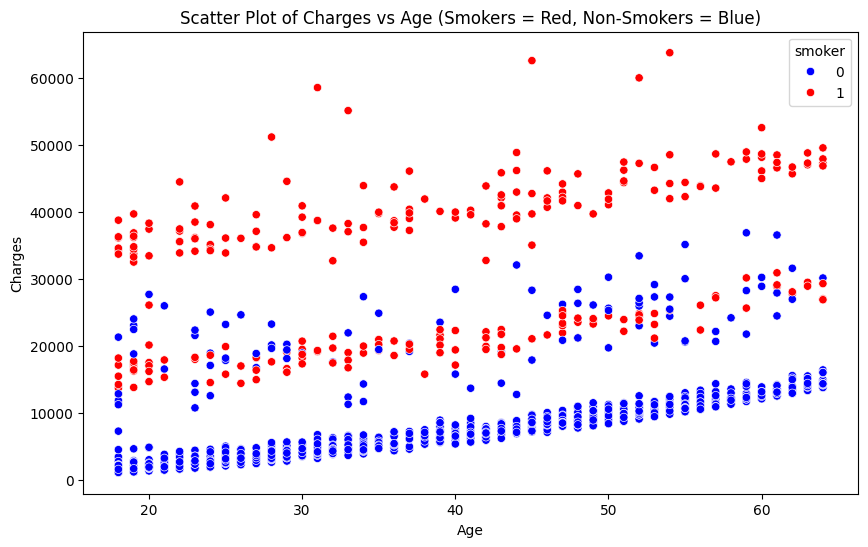

In [16]:
# Create scatter plot
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette={1: 'red', 0: 'blue'})

# Set labels and title
ax.set_title('Scatter Plot of Charges vs Age (Smokers = Red, Non-Smokers = Blue)')
plt.xlabel("Age")
plt.ylabel("Charges")

# Show plot
plt.show()

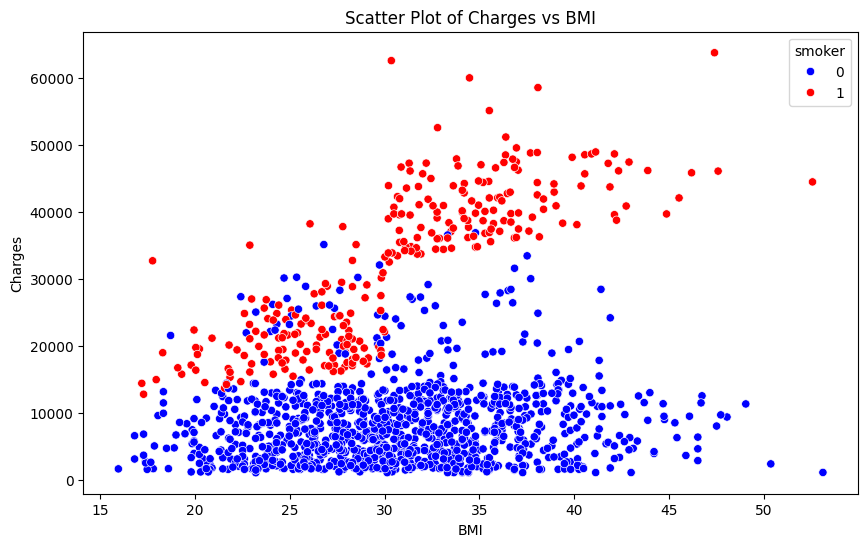

In [17]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette={1: 'red', 0: 'blue'})
ax.set_title('Scatter Plot of Charges vs BMI')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

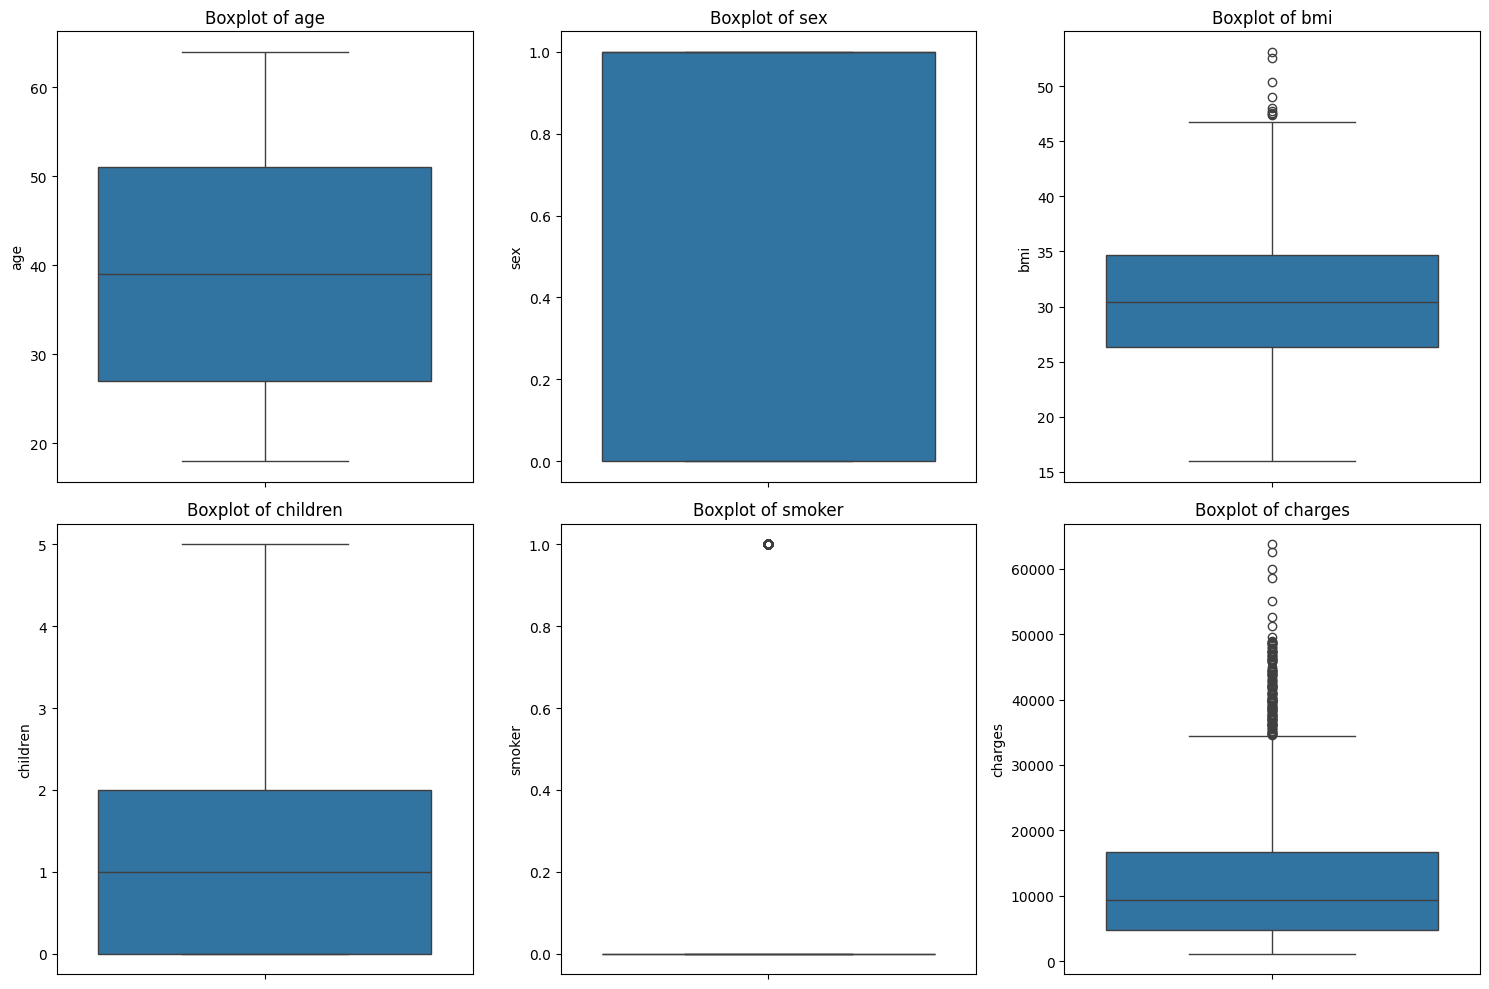

In [18]:
# Select numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Define grid size
num_cols = 3  # Number of columns in the grid
num_rows = -(-len(numeric_columns) // num_cols)  # Ceiling division to get required rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each boxplot in a subplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i])  # Vertical boxplot
    axes[i].set_title(f'Boxplot of {col}')

# Hide unused subplots if the number of columns is not a multiple of num_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

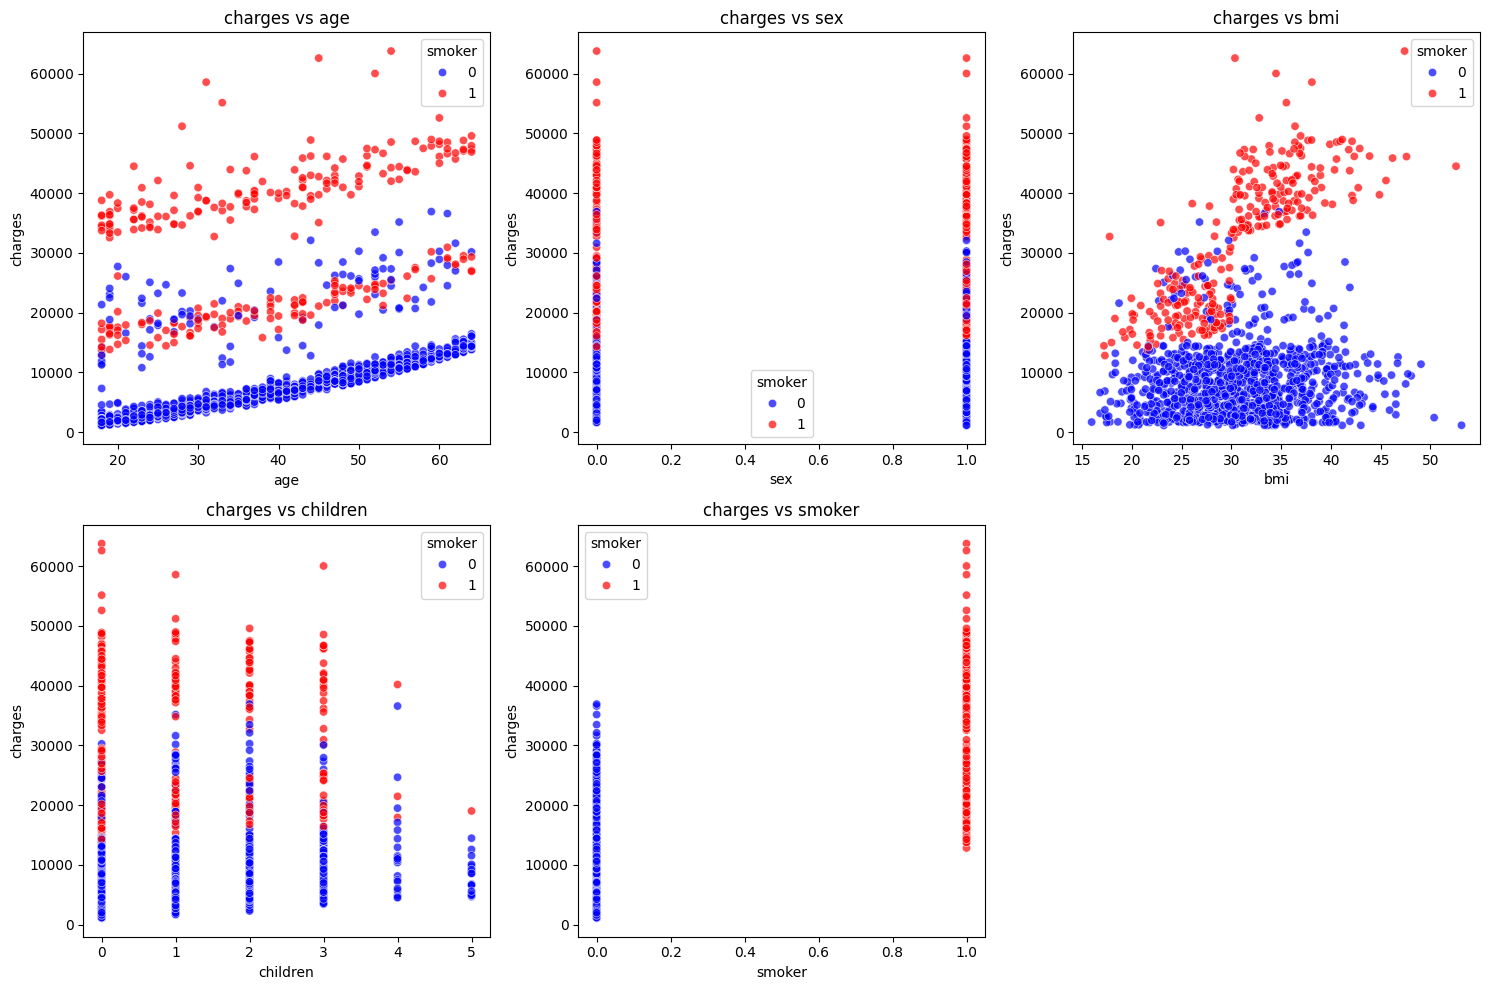

In [19]:
# Select numeric columns (excluding target variable)
target_col = "charges" 
numeric_columns = df.select_dtypes(include='number').columns.drop(target_col, errors='ignore')

# Define grid size
num_cols = 3  
num_rows = -(-len(numeric_columns) // num_cols) 

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot scatter plots
for i, col in enumerate(numeric_columns):
    sns.scatterplot(x=df[col], y=df[target_col], ax=axes[i], hue=df['smoker'], palette={1: 'red', 0: 'blue'}, alpha=0.7)
    axes[i].set_title(f'{target_col} vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Feture eng

In [20]:
#region
df = pd.get_dummies(df, columns=['region'] , drop_first=True, dtype=int)


In [21]:
df['overweight_smoker'] = df.apply(lambda row: 1 if row['bmi'] > 30 and row['smoker'] == 1 else 0, axis=1)

In [22]:
df['normal_Notsmoker'] = df.apply(lambda row: 1 if row['bmi'] < 30 and row['smoker'] == 0 else 0, axis=1)

In [23]:
df['charges'] = np.log(df['charges'])
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,overweight_smoker,normal_Notsmoker
0,19,0,27.900,0,1,9.734176,0,0,1,0,0
1,18,1,33.770,1,0,7.453302,0,1,0,0,0
2,28,1,33.000,3,0,8.400538,0,1,0,0,0
3,33,1,22.705,0,0,9.998092,1,0,0,0,1
4,32,1,28.880,0,0,8.260197,1,0,0,0,1


create model



_linear reg


In [24]:
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_squared_error, r2_score # type: ignore

In [25]:
X= df.drop('charges', axis=1)
y=df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [26]:
r2 = r2_score(y_test, y_pred)
r2

0.8435740541402428

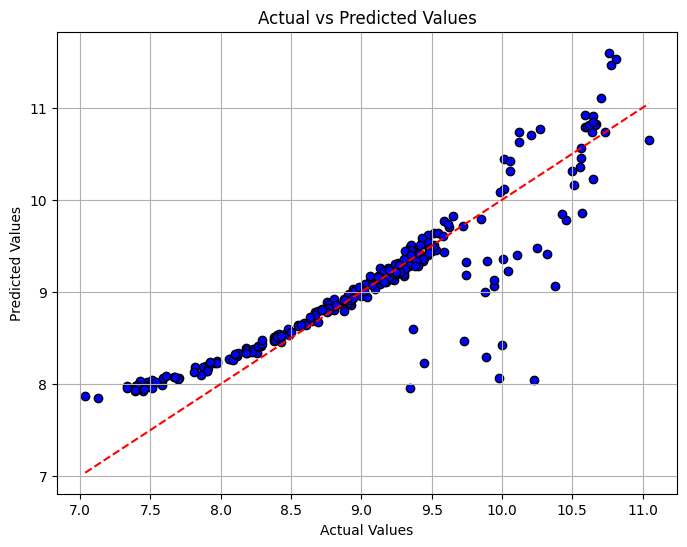

In [27]:
# Split the final transformed data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid()
plt.show()

_random forest

In [28]:
from sklearn.ensemble import RandomForestRegressor  

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)  # For regression
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [29]:
r2 = r2_score(y_test, y_pred)
r2

0.8407455282540128

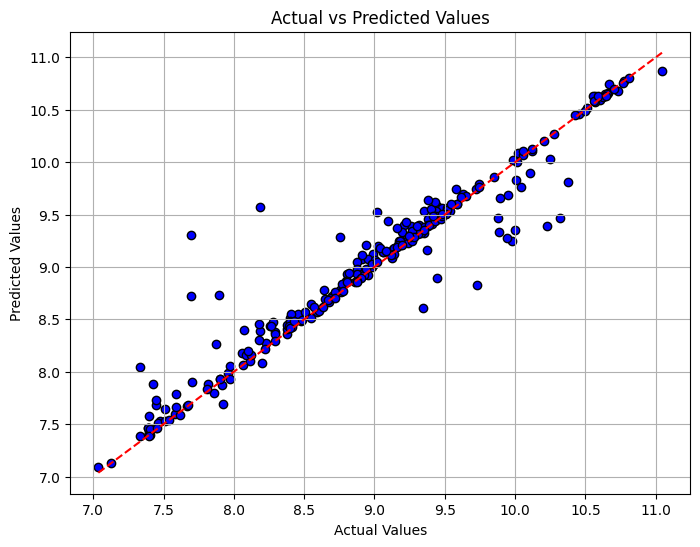

In [30]:
# Split the final transformed data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid()
plt.show()

feature_importances

In [31]:
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

             Feature  Importance
4             smoker    0.428652
0                age    0.379749
2                bmi    0.090573
3           children    0.048828
1                sex    0.012352
8  overweight_smoker    0.011829
5   region_northwest    0.010220
6   region_southeast    0.008224
7   region_southwest    0.005813
9   normal_Notsmoker    0.003759


Save the model

In [32]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']